# Data Munging

In [148]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.stats import pearsonr 
from operator import itemgetter

# Essential Functions

In [67]:
raw_train_data = pd.read_csv("sales_train.csv")
category_data = pd.read_csv("items.csv").loc[:,["item_id", "item_category_id"]]
df = raw_train_data.join(category_data.set_index("item_id"), on = "item_id").drop("date", axis = 1)
# category_data_dict = {x[0]:x[1] for x in category_data.itertuples(index = False)}
df = df.sample(frac=0.005, replace = True)

# One hot encoding

In [9]:
# not encoding item_id becasue possible unique set size is 22170
# for column in ["shop_id", "item_category_id"]:
#     df = pd.concat([df ,pd.get_dummies(df[column], prefix = column)], axis = 1)
#     df.drop([column], axis = 1, inplace = True)
# df.head()

# Abalation//pending

In [26]:
# print(len(set(category_data.item_category_id.unique())))
# print(len(set(category_data.item_id.unique())))
# print(len(set(raw_train_data.shop_id.unique())))
for i in range(0, 500, 50):
    print(len(raw_train_data[(raw_train_data.item_cnt_day > i)]), i)
#marginally small number of rows for item_cnt_day > 110 thus dropping outliers


2928493 0
523 50
138 100
61 150
38 200
29 250
23 300
19 350
19 400
15 450


In [13]:
# # def getSubSampleTrainTestSet(data_set,):
# sample_item_set = set(sample_train.item_id)
# len(sample_item_set)
# def isInTraining(item_id):
#     if item_id in sample_item_set:
#         return True
#     return False
# def getCategoryIdForItem(item_id):
# #     return category_data.loc[category_data["item_id"] == item_id , "item_id"]
#     return category_data_dict[item_id]



In [14]:
% matplotlib inline

In [62]:
# _df = df
# df.head()
len(pd.unique(_df.item_category_id))
# _df = df[["shop_id", "item_cnt_day", "item_price","item_category_id", "item_id"]].loc[(df["item_price"]<1000) 
# & (df["item_cnt_day"] < 5) & (df["item_price"] > 0) & (df["item_cnt_day"] > 0)]
# _df = df[['item_price','item_cnt_day','date_block_num','shop_id']].loc[(df['item_price']>0) & (df['item_price']<100000) & (df['item_cnt_day']<50)]

68

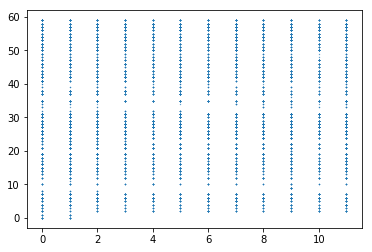

In [52]:
plt.scatter(_df["date_block_num"]%12,_df["shop_id"], s=0.1)

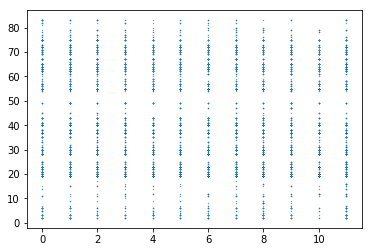

In [54]:
plt.scatter(_df["date_block_num"]%12,_df["item_category_id"], s=0.1)

In [ ]:
plt.scatter(_df["item_category_id"], _df["item_cnt_day"], s=0.1)

In [ ]:
plt.scatter(_df["item_price"], _df["item_cnt_day"], s=0.1)

In [ ]:
plt.scatter(_df["item_id"], _df["shop_id"], s=0.1)

In [ ]:
plt.scatter(_df["item_id"], _df["item_category_id"], s=0.1)

In [ ]:
plt.scatter(_df["shop_id"], _df["item_category_id"], s=0.1)

In [ ]:
_df.corr()

In [ ]:
plt.scatter(_df["item_price"], _df["item_category_id"], s=0.1)

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# figure = plt.figure()
# ax = figure.add_subplot(111, projection="3d")
# ax.scatter(_df["item_price"], _df["item_category_id"], _df["item_id"])
len(pd.unique(df["item_price"].astype(int)))

In [57]:
len(pd.unique(df["item_category_id"]))

KeyError: 'item_category_id'

# Model Fitting

In [76]:
raw_train_data = pd.read_csv("sales_train.csv")
category_data = pd.read_csv("items.csv").loc[:,["item_id", "item_category_id"]]
df = raw_train_data.join(category_data.set_index("item_id"), on = "item_id").drop("date", axis = 1)
# category_data_dict = {x[0]:x[1] for x in category_data.itertuples(index = False)}
# df = df.sample(frac=0.5, replace = True)

In [43]:
for column in ["shop_id", "item_category_id"]:
    df = pd.concat([df ,pd.get_dummies(df[column], prefix = column)], axis = 1)
    df.drop([column], axis = 1, inplace = True)
df.drop(["item_id"], axis = 1, inplace = True)

# purge outliers

In [44]:
df = df[(df.item_cnt_day <=100) & (df.item_cnt_day>0)]

In [46]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
df_train = df_train.sample(frac=0.5, replace = True)

In [47]:
# lm = linear_model.LinearRegression()
clf = RandomForestClassifier()
df_train_Y = df_train.filter(regex="item_cnt_day")
df_train_X = df_train.drop("item_cnt_day", axis=1, inplace = False)
df_test_Y = df_train.filter(regex="item_cnt_day")
df_test_X = df_train.drop("item_cnt_day", axis=1, inplace = False)

In [48]:
# lm.fit(df_train_X,df_train_Y)
clf.fit(df_train_X, df_train_Y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
# df_test_pred = lm.predict(df_test_X)
df_test_pred = clf.predict(df_test_X)

In [50]:
mean_absolute_error(df_test_Y.values, df_test_pred)

0.17951580441601428

In [51]:
mean_squared_error(df_test_Y.values, df_test_pred)

1.9864327990329884

In [54]:
y1_lr=[0.399834638,
0.402822358,
0.412699131,
0.38614226,
0.378504211,
0.395057717,
0.392557673]
y2_lr=[1.631286356,
2.784851408,
3.885549068,
3.119806024,
2.692876491,
5.54590429,
6.361979668]
x_lr=[0.001,
0.005,
0.01,
0.05,
0.1,
0.5,
1]

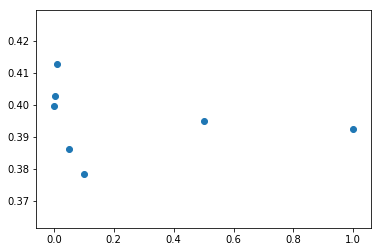

In [63]:
plt.scatter(x_lr,y1_lr)

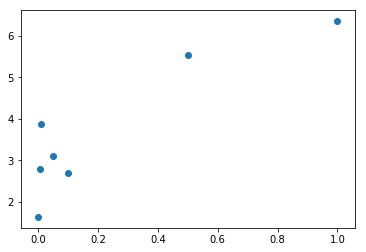

In [64]:
plt.scatter(x_lr,y2_lr)

In [52]:
y1_clf = [0.021294719,
0.05194584,
0.06523035,
0.105541032,
0.123435291,
0.16192854,
0.179515804]
y2_clf = [0.045144804,
0.250021289,
0.298475688,
0.719320804,
1.536262922,
2.862656354,
1.986432799]


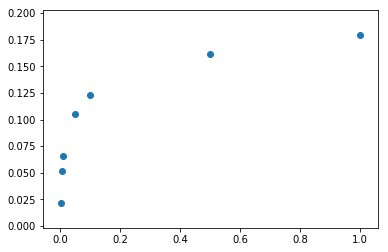

In [55]:
plt.scatter(x_lr, y1_clf)

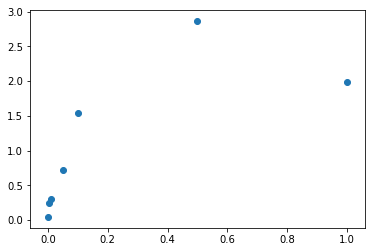

In [56]:
plt.scatter(x_lr, y2_clf)

In [119]:
cat_sum = {}
for category in pd.unique(df.item_category_id):
    category_date_list = []
    for date_val in pd.unique(df.date_block_num):
        sum_value = sum(df[(df.item_category_id == category) & (df.date_block_num == date_val)].item_cnt_day) 
        category_date_list.append([date_val, sum_value])
    cat_sum[category] = category_date_list

37
58
56
59
55
23
19
28
30
21
40
75
49
29
22
67
73
77
57
60
4
62
43
15
2
3
5
68
35
33
6
38
25
14
45
41
66
11
69
65
82
81
64
79
63
0
70
13
83
72
61
71
18
9
46
1
48
10
31
76
78
54
44
52
32
39
53
12
20
17
8
16
51
34
24
7
74
26
27
47
50
42
80
36


In [141]:
cat0 = cat_sum[58]
cat1 = cat_sum[56]
vec0 = [x[1] for x in cat0]
vec1 = [x[1] for x in cat1]
res = pearsonr(vec0, vec1)
print(res)

(0.6170837628974202, 0.00010143245507365011)


In [150]:
corelation_list = []
for cat0 in cat_sum.items():
    for cat1 in cat_sum.items():
        if cat0[0] == cat1[0]:
            continue
        vec0 = [x[1] for x in cat0[1]]
        vec1 = [x[1] for x in cat1[1]]
        res = pearsonr(vec0, vec1)
        corelation_list.append([res[0],cat0[0],cat1[0]])
# print(corelation_list)
# List of pearson corelation between categories in terms of monthly trend
sorted(corelation_list, key = itemgetter(0), reverse = True)

[[0.9843025156061643, 21, 4],
 [0.9843025156061643, 4, 21],
 [0.9788813343576078, 57, 43],
 [0.9788813343576078, 43, 57],
 [0.9739380387404731, 59, 82],
 [0.9739380387404731, 82, 59],
 [0.9738334896123596, 59, 77],
 [0.9738334896123596, 77, 59],
 [0.973189063509109, 4, 66],
 [0.973189063509109, 66, 4],
 [0.9711007182824449, 82, 81],
 [0.9711007182824449, 81, 82],
 [0.9710454136751061, 40, 43],
 [0.9710454136751061, 43, 40],
 [0.9688464196247115, 77, 66],
 [0.9688464196247115, 66, 77],
 [0.9686066083562548, 59, 66],
 [0.9686066083562548, 66, 59],
 [0.9659314681061107, 21, 66],
 [0.9659314681061107, 66, 21],
 [0.9618894523982012, 77, 82],
 [0.9618894523982012, 82, 77],
 [0.9603063864895234, 59, 4],
 [0.9603063864895234, 4, 59],
 [0.9589305048786283, 79, 34],
 [0.9589305048786283, 34, 79],
 [0.957149455094732, 15, 6],
 [0.957149455094732, 6, 15],
 [0.9551915369485501, 62, 2],
 [0.9551915369485501, 2, 62],
 [0.953947504001203, 77, 81],
 [0.953947504001203, 81, 77],
 [0.9534930048093956, 4,

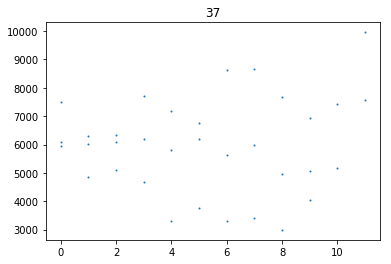

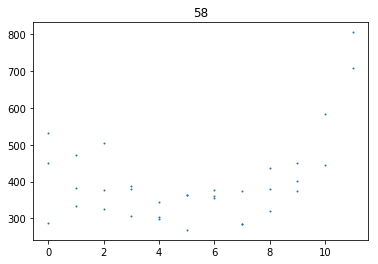

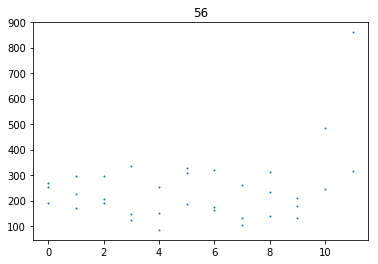

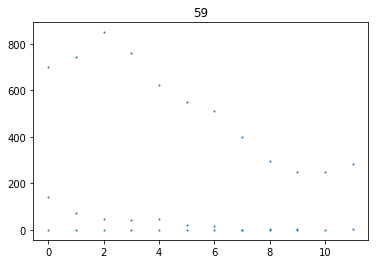

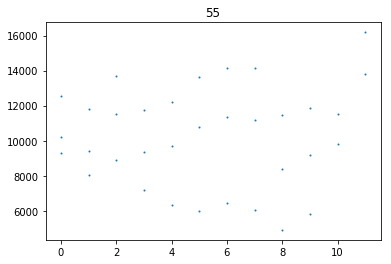

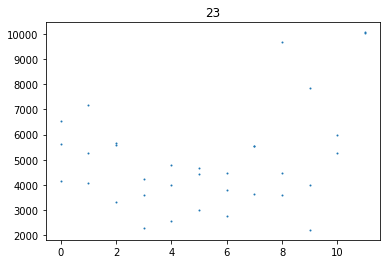

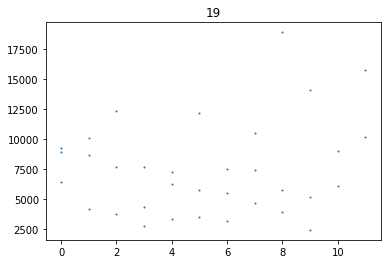

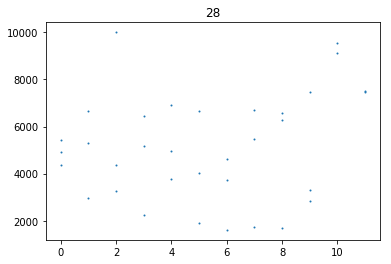

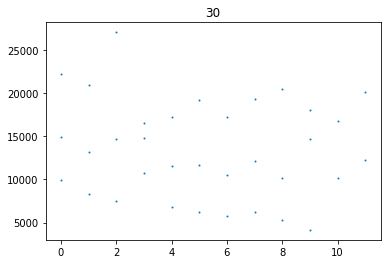

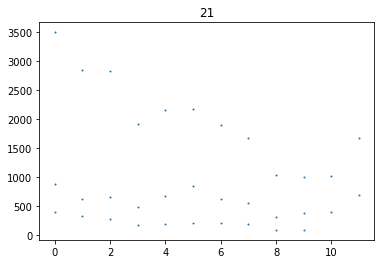

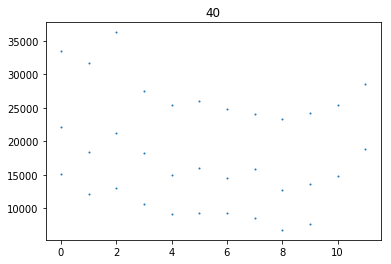

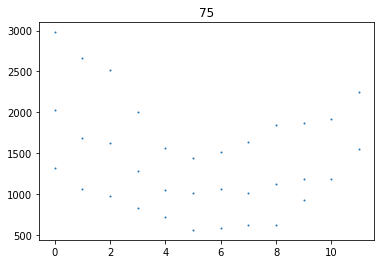

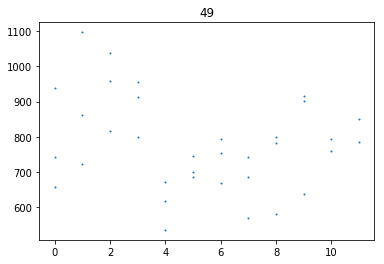

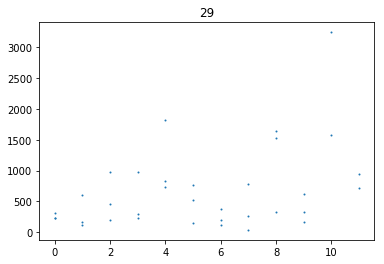

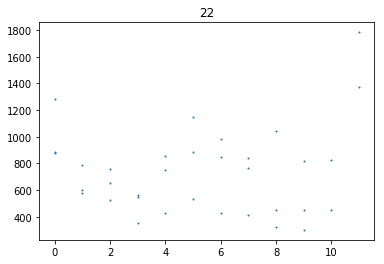

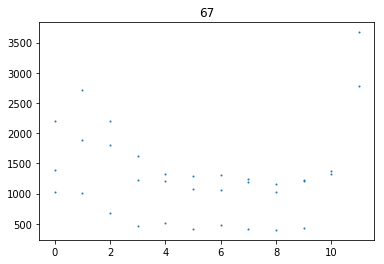

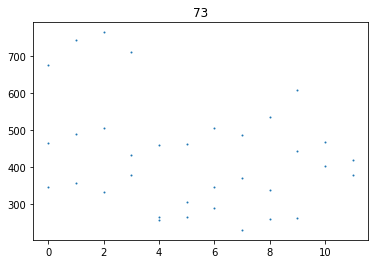

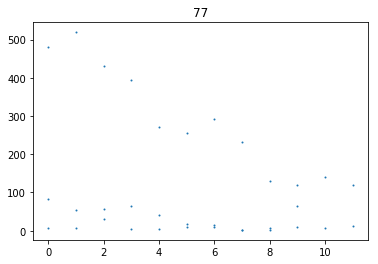

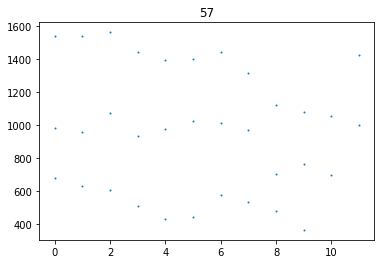

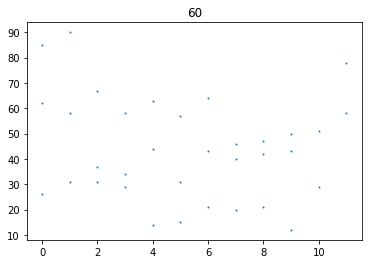

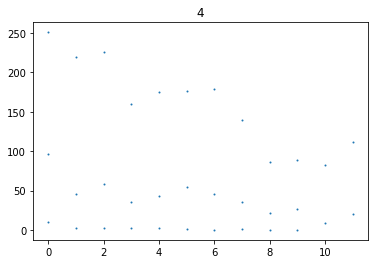

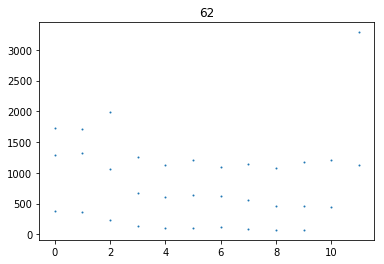

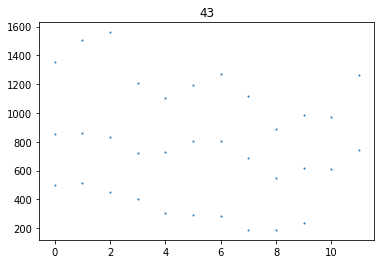

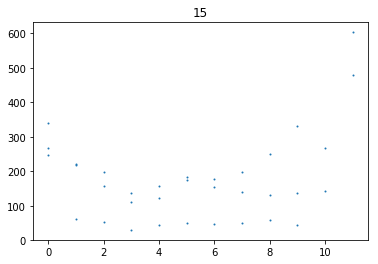

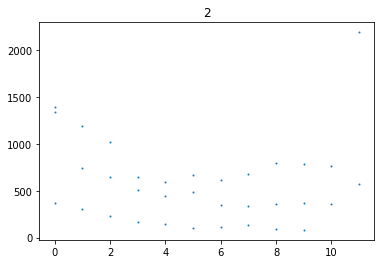

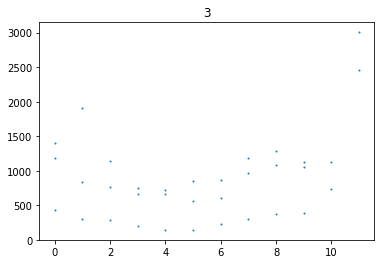

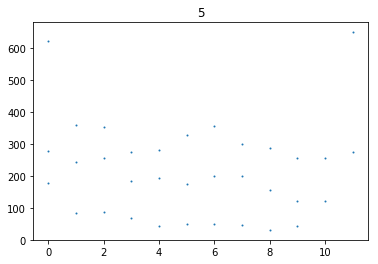

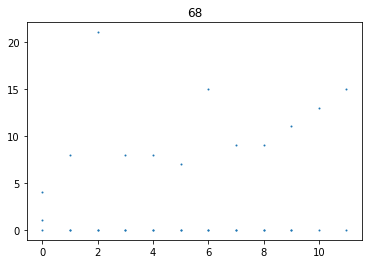

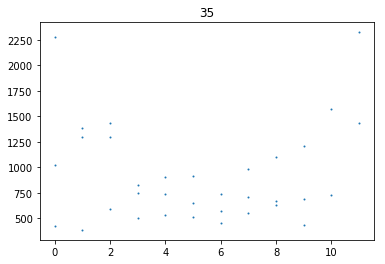

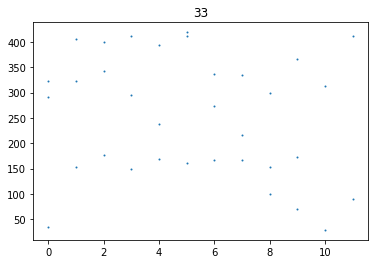

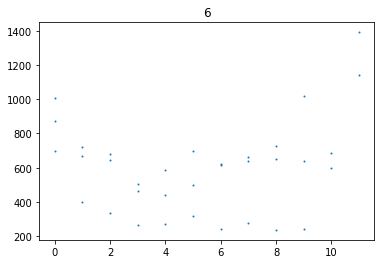

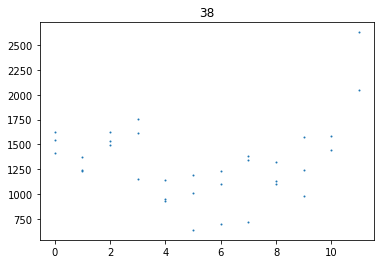

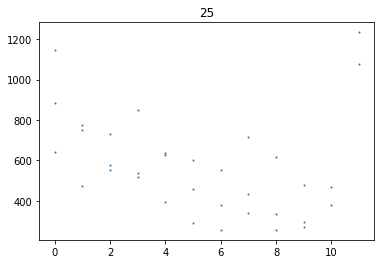

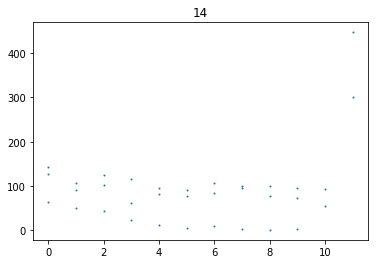

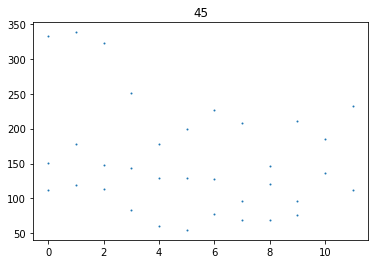

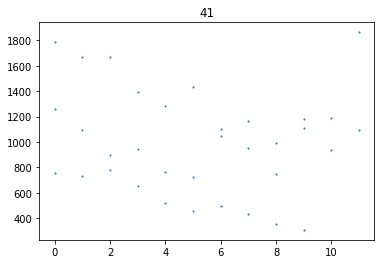

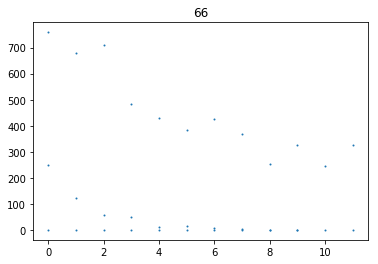

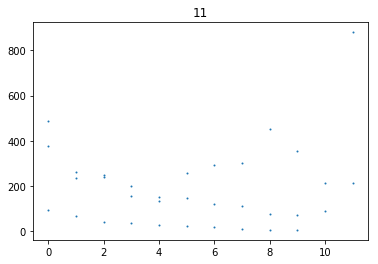

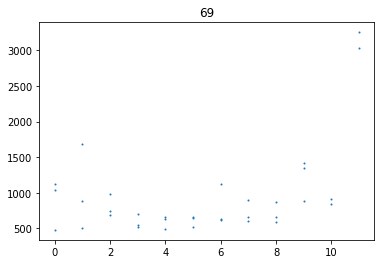

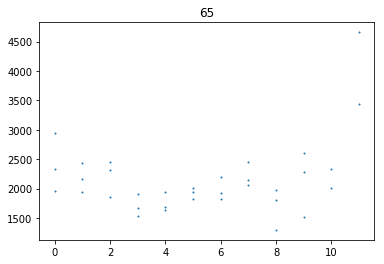

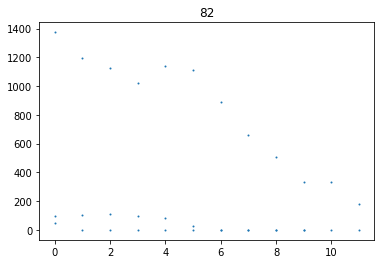

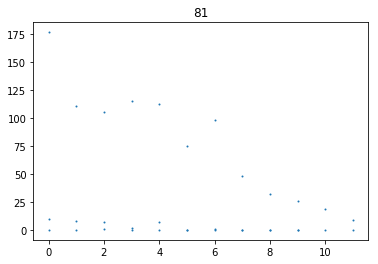

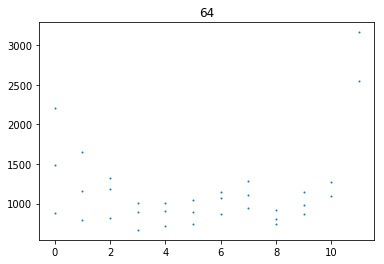

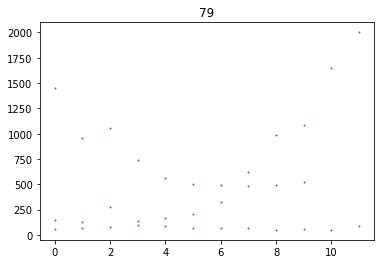

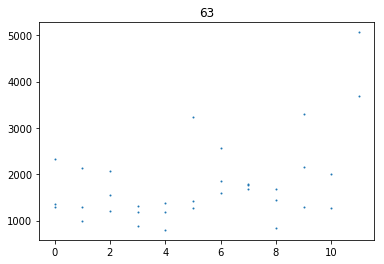

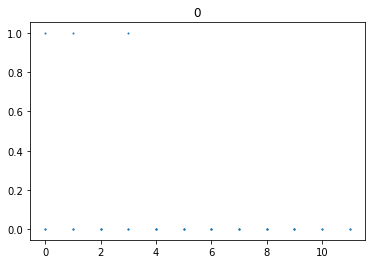

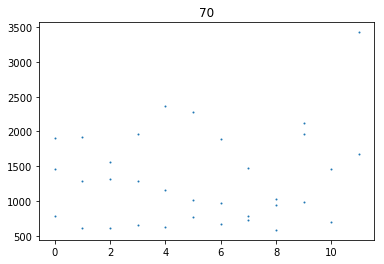

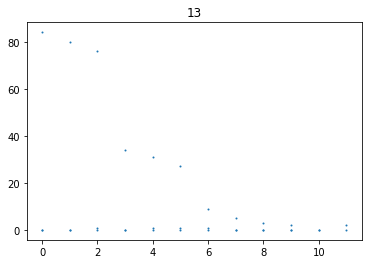

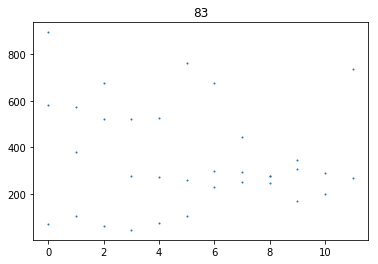

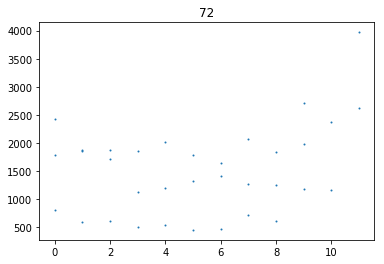

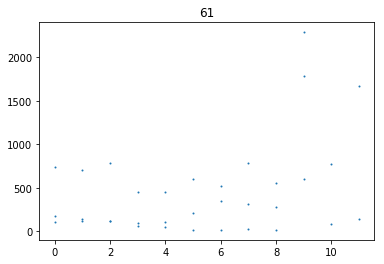

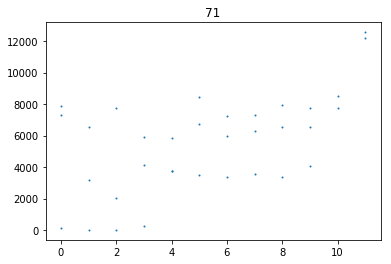

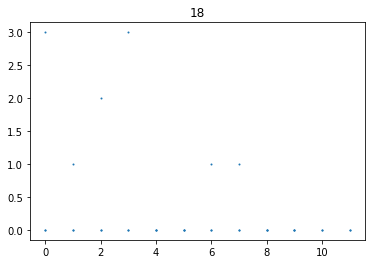

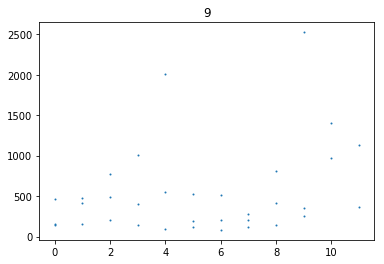

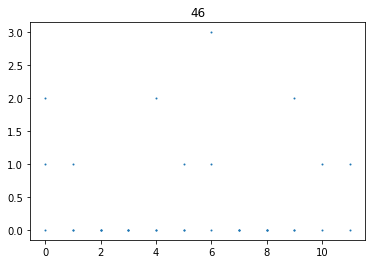

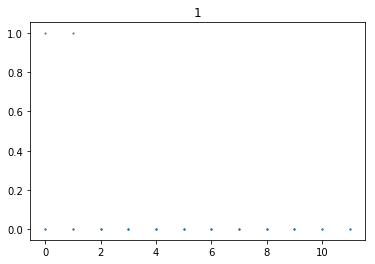

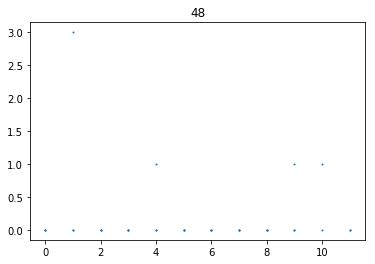

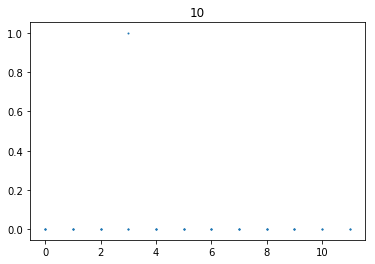

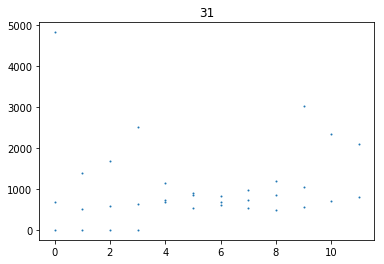

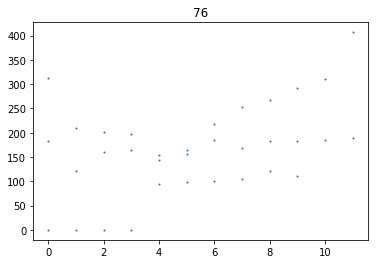

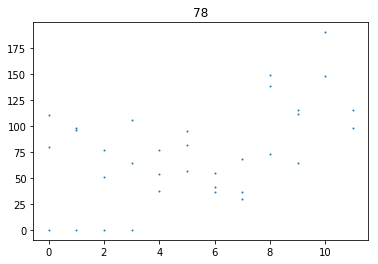

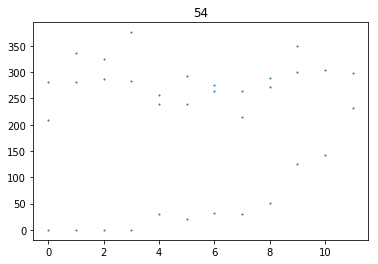

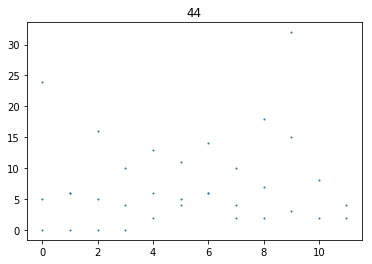

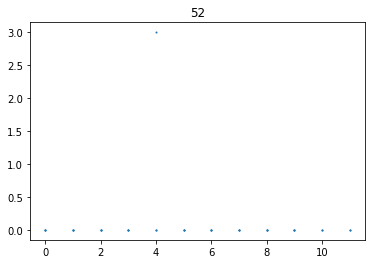

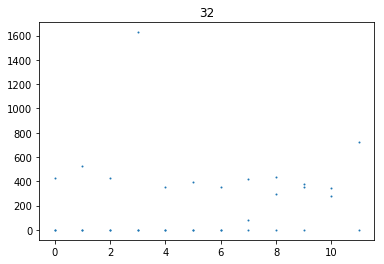

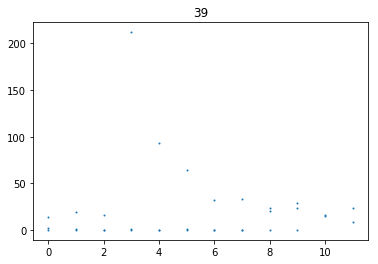

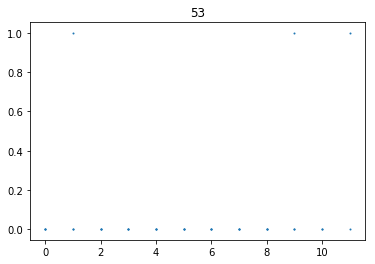

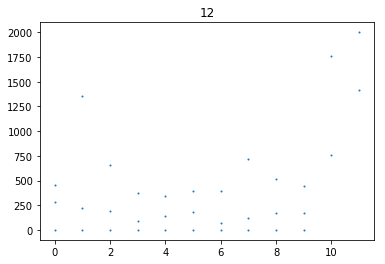

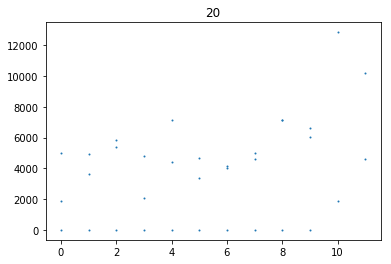

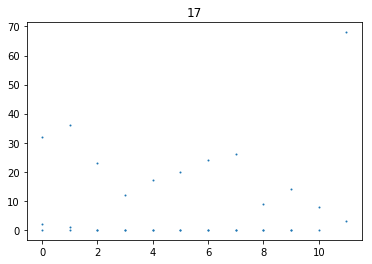

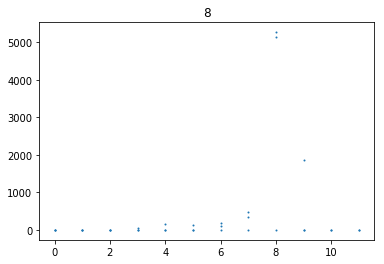

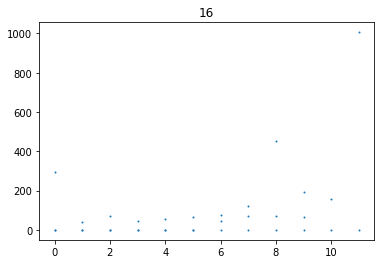

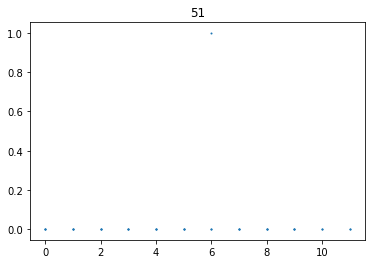

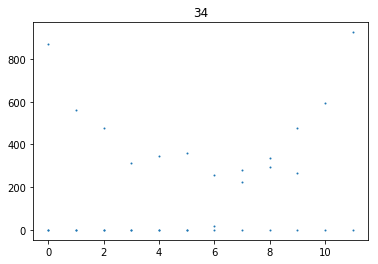

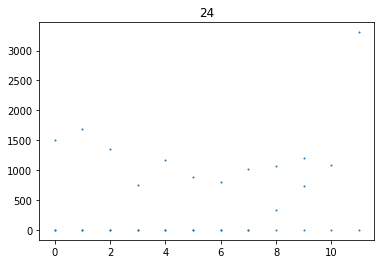

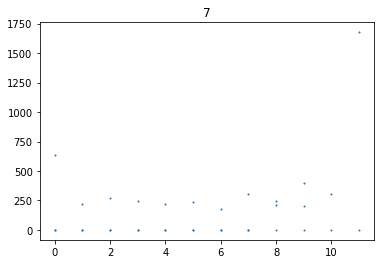

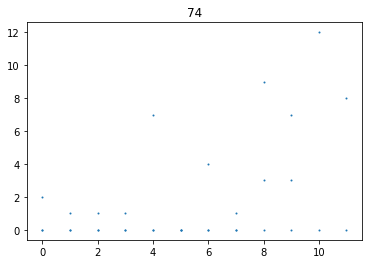

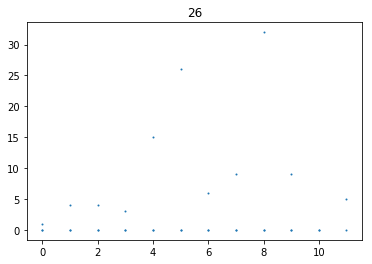

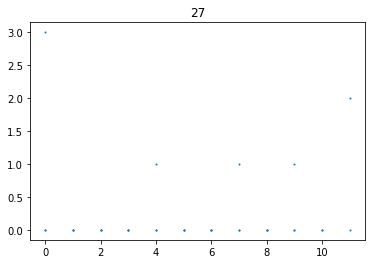

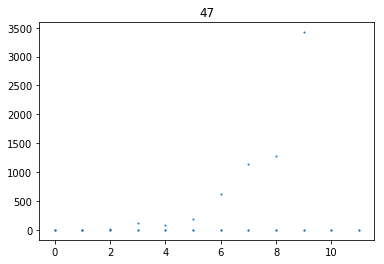

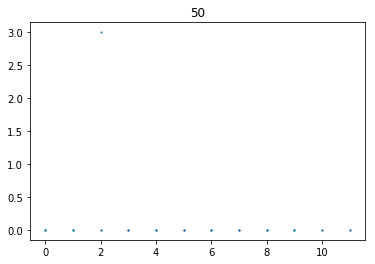

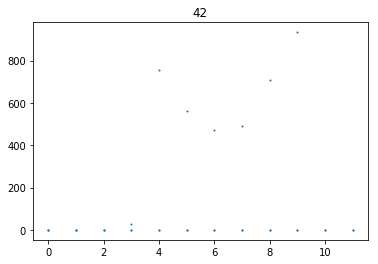

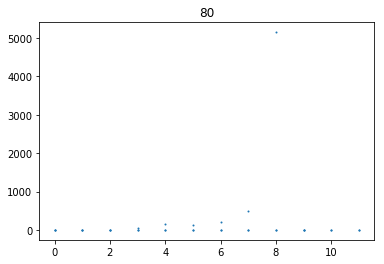

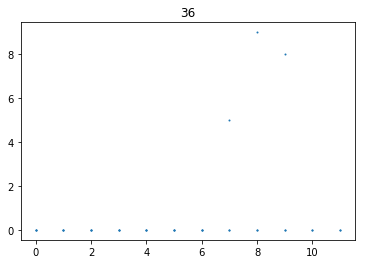

In [147]:
for cat in cat_sum.items():
    date_b = [x[0] for x in cat[1]]
    cnt_b = [x[1] for x in cat[1]]
    ax = plt.subplot()
    plt.scatter([x%12 for x in date_b], cnt_b, s=1)
    plt.title(cat[0])
    plt.show()
    

In [84]:
print(_df)

203284.0


10
0
100
